<!-- Germany has very little natural gas reserves of its own and therefore has to import the
majority of its natural gas. The annual import of natural gas in Germany is around
100 billionm3 (=1000 billionkWh) in order to meet the corresponding demand (the coun-
try’s own natural gas reserves and the consumption already covered by them are already
excluded; these no longer have to be taken into account in the future).
Until February 2022, the demand for imported natural gas in Germany was composed
as follows (for the sake of simplicity, the respective quantities can be equated with the
technically available import capacities for the following calculations):
• 30 % from Russia (10 % via Nord-Stream-Pipeline (Baltic Sea), 10 % via Poland/Belarus,
10 % via Austria/Czech Republic/Slovakia/Ukraine)
• 30 % from Nord Sea (Norwegian waters)
• 25 % from The Netherlands/UK
• 10 % from Belgium
• 5 % from Denmark
Until February 2022, the corresponding gas volumes via the individual import routes were
offered at the transfer points to Germany at the following wholesale prices:
• Nord-Stream-Pipeline (Ostsee): 7 EUR/MWh
• Poland/Belarus: 9 EUR/MWh
• Austria/Czech Republic/Slovakia/Ukraine: 10 EUR/MWh
• Nord Sea (Norwegian waters): 8 EUR/MWh
• The Netherlands/UK: 12 EUR/MWh
• Belgium: 13 EUR/MWh
• Denmark: 15 EUR/MWh -->

<h1 style="text-align:center;">370.043 VU Selected Topic in Energy Economics and Environment</h1>


<h3 style="text-align:center;">Assignment 1</h3>
<p style="text-align:center;">Marcus Dahlström (12402525) | Ali Türen (11925958)</p>
<p style="text-align:center;">25.10.2024</p>

---



>_a) Draw the supply curve for natural gas imports in Germany (axis labeling!) and determine the most expensive import route._

**Solution:** The given data from the assignment is seen in the table below.

<p style="text-align:center;">Table 1. Market shares and prices as given in the assignment.</p>

| Import Route | Share [%] | Price [EUR/MWh] | Total MWh |Total Cost [Million EUR]|
|--------------|-----------|-----------------|-----------|-----------------------|
| Nord Stream       | 10        | 7              | 10^8        | 700                   |
| Poland/Belarus    | 10        | 9              | 10^8        | 900                   |
| Austria/Czech/Slovakia/Ukraine | 10 | 10 | 10^8^ | 1000 |
| Nord Sea          | 30        | 8              | 3*10^8        | 2400                  |
| The Netherlands/UK| 25        | 12             | 2.5*10^8        | 3000                  |
| Belgium           | 10        | 13             | 10^8        | 1300                  |
| Denmark           | 5         | 15             | 0.5*10^8         | 750                   |

Using the given data the following supply curve can be drawn. The most expensive import route, in total EUR, is the one from The Netherlands/UK. The most expensive import route in EUR/MWh is the one from Denmark.

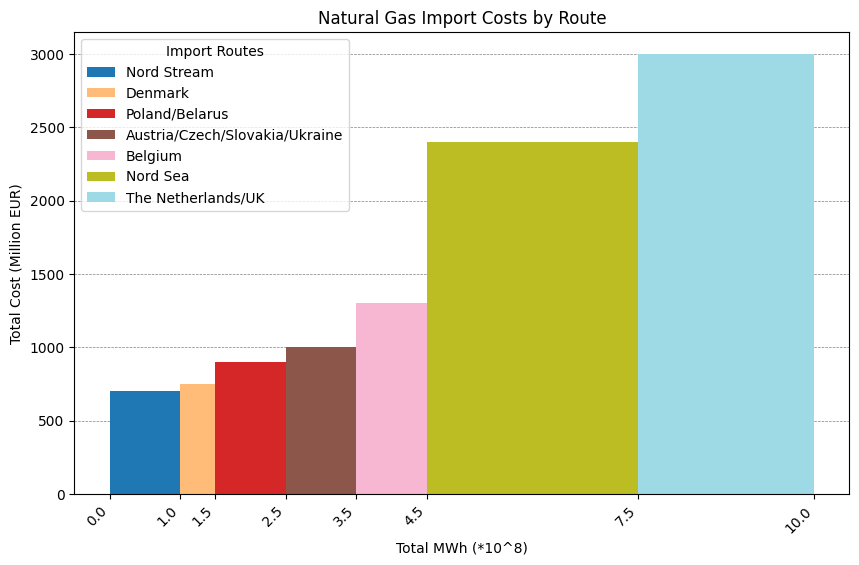

In [10]:
# The following code was generated with the help of github Copilot.

import matplotlib.pyplot as plt
import numpy as np

# Data from the table
import_routes = ['Nord Stream', 'Poland/Belarus', 'Austria/Czech/Slovakia/Ukraine', 'Nord Sea', 'The Netherlands/UK', 'Belgium', 'Denmark']
total_mwh = [10**8, 10**8, 10**8, 3*10**8, 2.5*10**8, 10**8, 0.5*10**8]
total_cost = [700, 900, 1000, 2400, 3000, 1300, 750]

# Combine the data into a list of tuples and sort by total cost
data = list(zip(import_routes, total_mwh, total_cost))
data.sort(key=lambda x: x[2])

# Unzip the sorted data
import_routes_sorted, total_mwh_sorted, total_cost_sorted = zip(*data)

# Normalize the total_mwh_sorted values
total_mwh_normalized = [mwh / 10**8 for mwh in total_mwh_sorted]

# Generate colors for each bar
colors = plt.cm.tab20(np.linspace(0, 1, len(total_mwh_normalized)))

# Calculate the positions of the bars
bar_positions = np.cumsum([0] + total_mwh_normalized[:-1])

# Calculate the accumulated MWh for x-ticks
accumulated_mwh = np.cumsum([0] + list(total_mwh_sorted)) / 10**8

# Plotting
plt.figure(figsize=(10, 6))

# Add horizontal gray bars to the background
for y in range(0, 3500, 500):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

bars = plt.bar(bar_positions, total_cost_sorted, color=colors, width=total_mwh_normalized, align='edge')

# Add import route names below the x-axis numbers
plt.xticks(bar_positions + np.array(total_mwh_normalized), import_routes_sorted, rotation=45, ha='right')

# Add numbers to the x-axis based on accumulated total_mwh values
plt.gca().set_xticks(np.concatenate(([0], bar_positions + np.array(total_mwh_normalized))))
plt.gca().set_xticklabels([f'{mwh:.1f}' for mwh in accumulated_mwh])

# Add legend
for bar, route in zip(bars, import_routes_sorted):
    bar.set_label(route)
plt.legend(title='Import Routes')

plt.xlabel('Total MWh (*10^8)')
plt.ylabel('Total Cost (Million EUR)')
plt.title('Natural Gas Import Costs by Route')
plt.show()

<p style="text-align:center;">Figure 1. Supply curve for the data in Table 1.</p>

---

> _b) Based on the above, calculate the so-called IRD factor (Import Route Diversification)
for Germany. The IRD factor is defined as follows:_

\begin{equation}
IRD = \sum_{l} \left( IP_{X,~border,~l} \right)^2 + \sum_{m} \left( LNG_{terminal,~m} \right)^2
\end{equation}

**Solution:** As it's not specified if a route is a pipeline or a LNG terminal, it is assumed that all routes are pipelines. Using the data from the table above, the IRD factor can be calculated as follows:

\begin{equation}
IRD = \left( 0.1^2 + 0.1^2 + 0.1^2 + 0.3^2 + 0.25^2 + 0.1^2 + 0.05^2 \right) = 0.195
\end{equation}

As an IRD of 1 means a monopoly, and 0 means infinitely many suppliers, the IRD factor of 0.195 indicates a relatively low level of market concentration.

---

> _c) It has already been assumed in previous years (i.e. before February 2022) that due to
political tensions with both Ukraine and Belarus, there may be supply interruptions
at any time and the 2 corresponding gas import routes to Germany are no longer
fully available (i.e. it is assumed that the 3rd route (Baltic Sea pipelines) is still fully
available). If it is now assumed that a corresponding loss of imports of ”Russian gas”
via these 2 routes to 80 % is compensated by newly built LNG terminals on the coast
of northern Germany and to 20 % by import capacity expansions from the North Sea
(Norwegian waters): What is the new IRD factor for Germany according to this new
situation?_

**Solution:** The two routes that are no longer fully available are Poland/Belarus and Austria/Czech/Slovakia/Ukraine. The losses are covered by $0.2*0.8 = 0.16$ from new LNG terminals and $0.2*0.2 = 0.04$ from increased imports from Nord Sea. The new IRD factor is calculated as follows:

\begin{equation}
IRD = \left( 0.1^2 + (0.3 + 0.04)^2 + 0.25^2 + 0.1^2 + 0.05^2 \right) + \left(0.16^2\right) = 0.2262
\end{equation}

The increase in IRD is expected, as the diversification of import routes decreased when two routes were lost and replaced by one new route and the expansion of an existing.

---

> _d) Draw the new supply curve for natural gas imports in Germany assumed under point
c) (axis labeling!), if it is assumed that the newly added LNG quantities have 3 times
the price level as the most expensive import route to date under point a. The volume
expansions from the North Sea will be offered 10% below the price level of the newly
added LNG volumes._

**Solution:** Using the most expensive import route in terms of _total EUR cost_ from task a), which was The Netherlands/UK router, the new LNG terminals will have a price of $3*12 = 36$ EUR/MWh. The price of the volume expansions from the Nord Sea will be $0.9*36 = 32.4$ EUR/MWh. The updated price table and supply curve can be seen below.

<p style="text-align:center;">Table 2. Market shares and prices after two closed routes, new LNG terminals, and expanded Nord Sea import.</p>

| Import Route | Share [%] | Price [EUR/MWh] | Total MWh |Total Cost [Million EUR]|
|--------------|-----------|-----------------|-----------|-----------------------|
| Nord Stream       | 10        | 7              | 10^8        | 700                   |
| Nord Sea          | 30        | 8              | 3*10^8        | 2400                  |
| The Netherlands/UK| 25        | 12             | 2.5*10^8        | 3000                  |
| Belgium           | 10        | 13             | 10^8        | 1300                  |
| Denmark           | 5         | 15             | 0.5*10^8         | 750                   |
| New LNG terminals | 16     | 36             | 1.6*10^8        | 5760                  |
| Nord Sea exp.    | 4      | 32.4           | 0.4*10^8        | 1296                  |


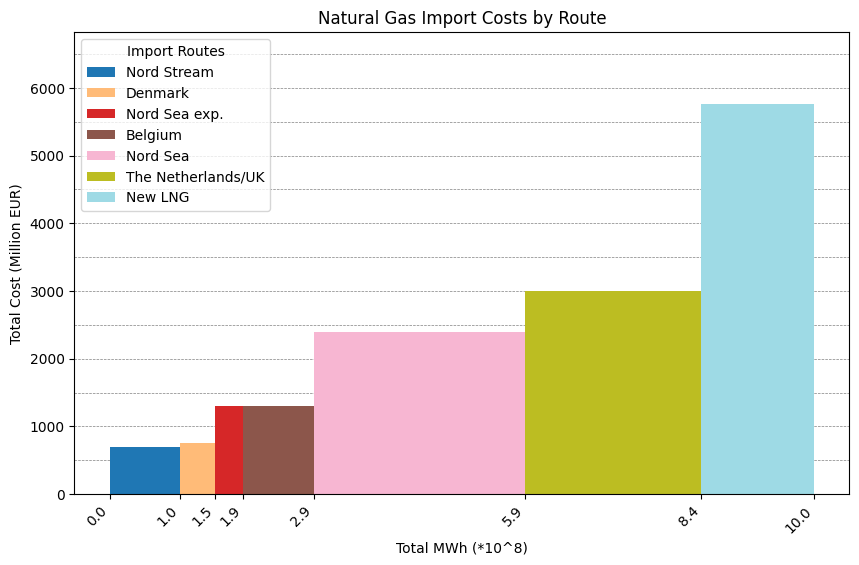

In [9]:
# The following code was generated with the help of github Copilot.

import matplotlib.pyplot as plt
import numpy as np

# Data from the table
import_routes = ['Nord Stream', 'Nord Sea', 'The Netherlands/UK', 'Belgium', 'Denmark', 'New LNG', 'Nord Sea exp.']
total_mwh = [10**8, 3*10**8, 2.5*10**8, 10**8, 0.5*10**8, 1.6*10**8, 0.4*10**8]
total_cost = [700, 2400, 3000, 1300, 750, 5760, 1296]

# Combine the data into a list of tuples and sort by total cost
data = list(zip(import_routes, total_mwh, total_cost))
data.sort(key=lambda x: x[2])

# Unzip the sorted data
import_routes_sorted, total_mwh_sorted, total_cost_sorted = zip(*data)

# Normalize the total_mwh_sorted values
total_mwh_normalized = [mwh / 10**8 for mwh in total_mwh_sorted]

# Generate more distinct colors for each bar using the tab20 colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(total_mwh_normalized)))

# Calculate the positions of the bars
bar_positions = np.cumsum([0] + total_mwh_normalized[:-1])

# Calculate the accumulated MWh for x-ticks
accumulated_mwh = np.cumsum([0] + list(total_mwh_sorted)) / 10**8

# Plotting
plt.figure(figsize=(10, 6))

# Add horizontal gray bars to the background
for y in range(0, 7000, 500):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

bars = plt.bar(bar_positions, total_cost_sorted, color=colors, width=total_mwh_normalized, align='edge')

# Add import route names below the x-axis numbers
plt.xticks(bar_positions + np.array(total_mwh_normalized), import_routes_sorted, rotation=45, ha='right')

# Add numbers to the x-axis based on accumulated total_mwh values
plt.gca().set_xticks(np.concatenate(([0], bar_positions + np.array(total_mwh_normalized))))
plt.gca().set_xticklabels([f'{mwh:.1f}' for mwh in accumulated_mwh])

# Add legend
for bar, route in zip(bars, import_routes_sorted):
    bar.set_label(route)
plt.legend(title='Import Routes')

plt.xlabel('Total MWh (*10^8)')
plt.ylabel('Total Cost (Million EUR)')
plt.title('Natural Gas Import Costs by Route')
plt.show()

<p style="text-align:center;">Figure 2. Supply curve with the updated data from Table 2.</p>

---

> _e) If, on the basis of the situation under Point d) with regard to LNG (for piped
North Sea gas (Norwegian waters) use the parameters under Point a): 30% and
8 EUR/MWh)), the following is assumed: Now the German gas market will be
”flooded” in the long term up to the fully available LNG capacity of 60 billion m3
at a price of 10 EUR/MWh. Which import routes will be kicked out from the gas
supply as a result? Which import route is now the most expensive one? Please draw
this new gas import supply curve for Germany below?_

**Solution:** The residual demand after including the full LNG capacity is $100 - 60 = 40$ billion m3 (or 400 billion kWh = 4*10^8 MWh). From task d) the routes from Poland/Belarus and Austria/Czech/Slovakia/Ukraine were lost. It is assumed based on the instructions to refer to the Nord Sea parameters from task a), that the expanded route from Nord Sea as well as the new LNG terminals are not to be inluded in this task. This means that the available total supply can be seen in the following table.

<p style="text-align:center;">Table 3. Import shares and prices after market flooding.</p>

| Import Route | Share [%] | Price [EUR/MWh] | Total MWh |Total Cost [Million EUR]|
|--------------|-----------|-----------------|-----------|-----------------------|
| Nord Stream       | 10        | 7              | 10^8        | 700                   |
| Belgium           | 10        | 13             | 10^8        | 1300                  |
| Denmark           | 5         | 15             | 0.5*10^8         | 750                   |
| Nord Sea          | 30        | 8              | 3*10^8        | 2400                  |
| The Netherlands/UK| 25        | 12             | 2.5*10^8        | 3000                  |
| Stored LNG       | 60       | 10             | 6*10^8        | 6000                  |

Here it can be seen that the total required supply can be met with the Nord Stream, Nord Sea, and stored LNG. This means that the routes from Belgium, Denmark, and The Netherlands/UK won't be needed, which is well as they are the most expensive ones in terms of EUR/MWh. The new supply curve can be seen below.

The new IRD factor can be calculated as follows:

\begin{equation}
IRD = \left( 0.1^2 + 0.3^2 + 0.6^2 \right) = 0.46
\end{equation}

Where it can be seen that the IRD factor has more than doubled compare to before. This is due to the fact that the diversification of import routes has decreased significantly, as there are only three routes left.

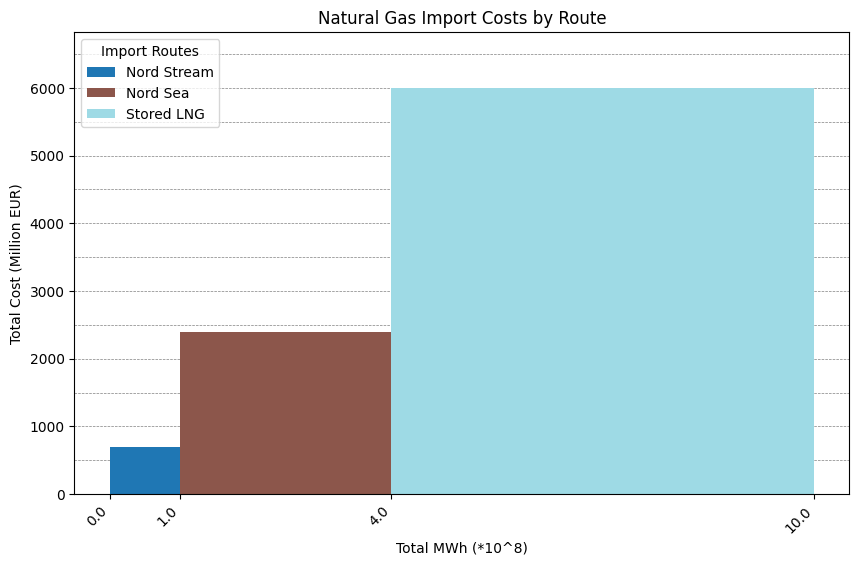

In [1]:
# The following code was generated with the help of github Copilot.

import matplotlib.pyplot as plt
import numpy as np

# Data from the table
import_routes = ['Nord Stream', 'Nord Sea',  'Stored LNG']
total_mwh = [10**8, 3*10**8, 6*10**8]
total_cost = [700, 2400, 6000]

# Combine the data into a list of tuples and sort by total cost
data = list(zip(import_routes, total_mwh, total_cost))
data.sort(key=lambda x: x[2])

# Unzip the sorted data
import_routes_sorted, total_mwh_sorted, total_cost_sorted = zip(*data)

# Normalize the total_mwh_sorted values
total_mwh_normalized = [mwh / 10**8 for mwh in total_mwh_sorted]

# Generate more distinct colors for each bar using the tab20 colormap
colors = plt.cm.tab20(np.linspace(0, 1, len(total_mwh_normalized)))

# Calculate the positions of the bars
bar_positions = np.cumsum([0] + total_mwh_normalized[:-1])

# Calculate the accumulated MWh for x-ticks
accumulated_mwh = np.cumsum([0] + list(total_mwh_sorted)) / 10**8

# Plotting
plt.figure(figsize=(10, 6))

# Add horizontal gray bars to the background
for y in range(0, 7000, 500):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, zorder=0)

bars = plt.bar(bar_positions, total_cost_sorted, color=colors, width=total_mwh_normalized, align='edge')

# Add import route names below the x-axis numbers
plt.xticks(bar_positions + np.array(total_mwh_normalized), import_routes_sorted, rotation=45, ha='right')

# Add numbers to the x-axis based on accumulated total_mwh values
plt.gca().set_xticks(np.concatenate(([0], bar_positions + np.array(total_mwh_normalized))))
plt.gca().set_xticklabels([f'{mwh:.1f}' for mwh in accumulated_mwh])

# Add legend
for bar, route in zip(bars, import_routes_sorted):
    bar.set_label(route)
plt.legend(title='Import Routes')

plt.xlabel('Total MWh (*10^8)')
plt.ylabel('Total Cost (Million EUR)')
plt.title('Natural Gas Import Costs by Route')
plt.show()

<p style="text-align:center;">Figure 3. Supply curve after kicking out two routes after flooding.</p>